<a href="https://colab.research.google.com/github/s183796/AIStudentProjects/blob/christine/DataSet_DataLoader_and_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
import cv2
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision.transforms as transforms
import glob
import os
import matplotlib.pyplot as plt

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
root_dir = 'drive/My Drive/02456_Deep_Learning/AI data/'

In [78]:
class SOCDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_folder = os.path.join(root_dir, 'data/')
        self.label_folder = os.path.join(root_dir, 'labels/')
        self.transform = transform

        self.image_filenames = [f for f in os.listdir(self.image_folder) if f.endswith('.tiff')]
        self.label_filenames = [f for f in os.listdir(self.label_folder) if f.endswith('.tif')]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
      img_name = os.path.join(self.image_folder, self.image_filenames[idx])
      label_name = os.path.join(self.label_folder, self.label_filenames[idx])

      image = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
      label = cv2.imread(label_name, cv2.IMREAD_GRAYSCALE)

      if self.transform:
          image = self.transform(image)
          label = self.transform(label)

      return image, label

### Transforms

In [79]:
transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomCrop(size=(128, 128)),
     transforms.Normalize((0.5), (0.5)),  # subtract 0.5 and divide by 0.5
     transforms.Grayscale(num_output_channels=1)
    ]
)

In [80]:
example_im = cv2.imread(root_dir + 'data/SOCprist0001.tiff')

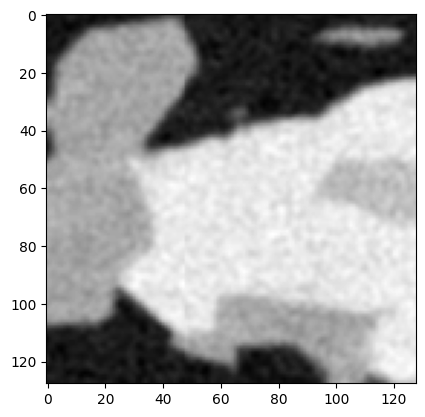

In [90]:
out = transforms(example_im)

plt.imshow(out[0], cmap='gray')

In [82]:
SOC_dataset = SOCDataset(root_dir, transform = transforms)

In [83]:
len(SOC_dataset)

500

In [84]:
# Test the __getitem__ method for a few sample indices
sample_indices = [0, 10, 20]  # You can choose any indices within the dataset length

for idx in sample_indices:
    image, label = SOC_dataset[idx]

    # Perform any necessary checks or assertions here
    print(f"Sample {idx}: Image shape: {image.shape}, Label shape: {label.shape}")

Sample 0: Image shape: torch.Size([1, 128, 128]), Label shape: torch.Size([1, 128, 128])
Sample 10: Image shape: torch.Size([1, 128, 128]), Label shape: torch.Size([1, 128, 128])
Sample 20: Image shape: torch.Size([1, 128, 128]), Label shape: torch.Size([1, 128, 128])


In [85]:
SOC_dataset[0][1]

tensor([[[-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ...,  0.0039,  0.0039,  0.0039],
         [-1.0000, -1.0000, -1.0000,  ...,  0.0039,  0.0039,  0.0039],
         [-1.0000, -1.0000, -1.0000,  ...,  0.0039,  0.0039,  0.0039]]])

In [87]:
from sklearn.model_selection import train_test_split

# Create an instance of your custom dataset
dataset = SOCDataset(root_dir, transform=transforms)

TEST_SIZE = 0.1
BATCH_SIZE = 24
SEED = 42

# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices = train_test_split(
    range(len(SOC_dataset)),
    test_size=TEST_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(SOC_dataset, train_indices)
test_split = Subset(SOC_dataset, test_indices)

# create batches
train_loader = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_split, batch_size=BATCH_SIZE)
